# **What is the most optimal skill to learn for Data Analysts?**

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Hani\anaconda3\envs\python_project1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


#### **Calculate Percent of Job Postings that Have Skills**

In [3]:
# using df_DA find the count of skills and also the median salary for each skill
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_US)  # Find count of Data Analyst jobs in US with salary info

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

df_DA_skills = df_DA_skills[df_DA_skills['skill_count'] > 0]

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
theano,1,100000.0,0.022989
typescript,1,65000.0,0.022989
vmware,1,147500.0,0.022989


#### **Median Salary vs Percent Skill Demand**

In [13]:
skill_limit = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]
df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


In [6]:
!pip install adjustText

   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
    --------------------------------------- 0.5/41.2 MB 3.4 MB/s eta 0:00:13
   - -------------------------------------- 1.3/41.2 MB 3.4 MB/s eta 0:00:12
   - -------------------------------------- 1.8/41.2 MB 3.2 MB/s eta 0:00:13
   -- ------------------------------------- 2.6/41.2 MB 3.3 MB/s eta 0:00:12
   --- ------------------------------------ 3.4/41.2 MB 3.3 MB/s eta 0:00:12
   ---- ----------------------------------- 4.2/41.2 MB 3.3 MB/s eta 0:00:12
   ---- ----------------------------------- 5.0/41.2 MB 3.3 MB/s eta 0:00:11
   ----- ---------------------------------- 5.2/41.2 MB 3.3 MB/s eta 0:00:11
   ------ --------------------------------- 6.3/41.2 MB 3.3 MB/s eta 0:00:11
   ------ --------------------------------- 7.1/41.2 MB 3.3 MB/s eta 0:00:11
   ------- -------------------------------- 7.6/41.2 MB 3.3 MB/s eta 0:00:11
   -------- ------------------------------- 8.4/41.2 MB 3.3 MB/s eta 0:00:11
   ---

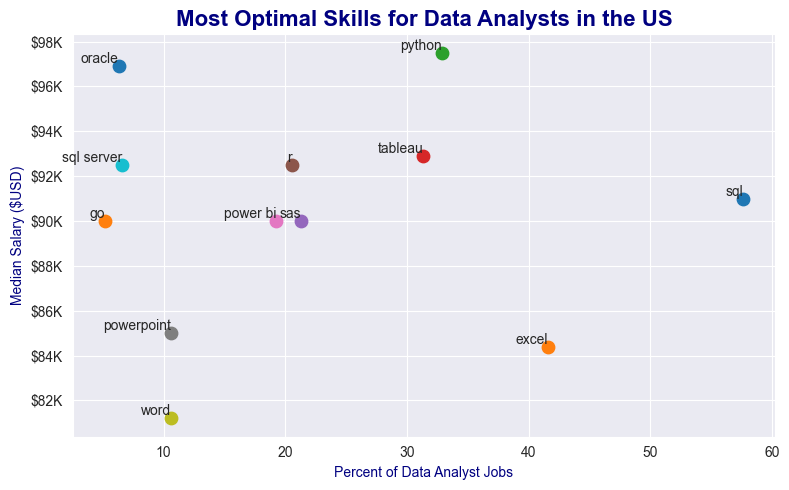

In [ ]:
sns.set_style('darkgrid')

# Buat figure dan axis
fig, ax = plt.subplots(figsize=(8, 5))

# Buat  daftar warna unik dalam setiap skill menggunakan seaborn color pallete
colors = sns.color_palette('tab10', n_colors = len(df_DA_skills_high_demand))

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

# add point with unique color for every skill
for i, (index,row) in enumerate( df_DA_skills_high_demand.iterrows()):
  ax.scatter(row['skill_percent'], row['median_salary'], color= colors[i],edgecolors=colors[i], label=index, s=80)

# Add labels to points
# struktur : ax.text(x, y, label, fontsize=10, ha='right', va='bottom')
for i, (index,row) in enumerate (df_DA_skills_high_demand.iterrows()):
    ax.text(row['skill_percent'], row['median_salary'], index, fontsize=10, ha='right' , va='bottom')

# Set title plot etc
ax.set_title('Most Optimal Skills for Data Analysts in the US', fontsize=16, fontweight='bold', color='navy')
ax.set_xlabel('Percent of Data Analyst Jobs', fontsize=10, color='navy')
ax. set_ylabel ('Median Salary ($USD)', fontsize = 10, color = 'navy')
fig.tight_layout()
plt.show()